In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Automobile.csv')

In [4]:
#identifying dimension, structure, summary
print("Dimension", df.shape)
print("Structure", df.info())
print("Summary", df.describe())

Dimension (398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
Structure None
Summary               mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000 

In [46]:
#preprocess data, checking null values
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

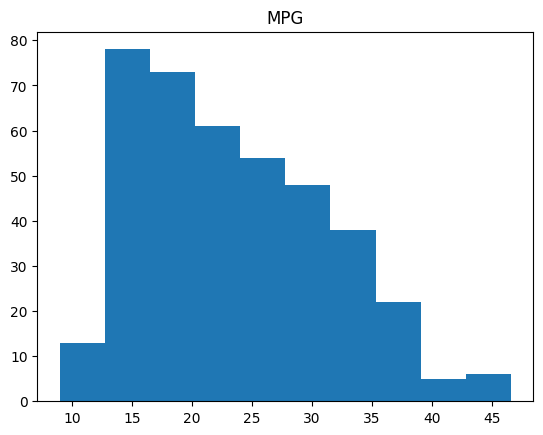

In [18]:
# Select two continuous variables to plot histograms
plt.title("MPG")
plt.hist(df['mpg'])

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

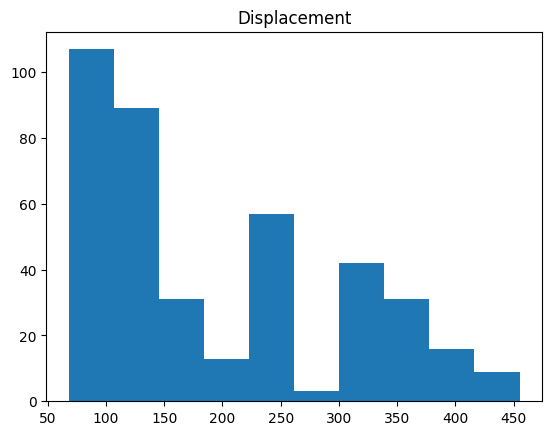

In [19]:
plt.title("Displacement")
plt.hist(df['displacement'])

/home/abhishekg/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='weight'>

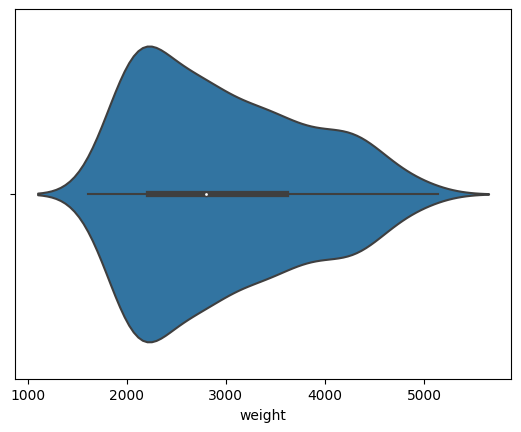

In [24]:
#violinplot to describe the distribution of numerical variable
sns.violinplot(data=df,x='weight')

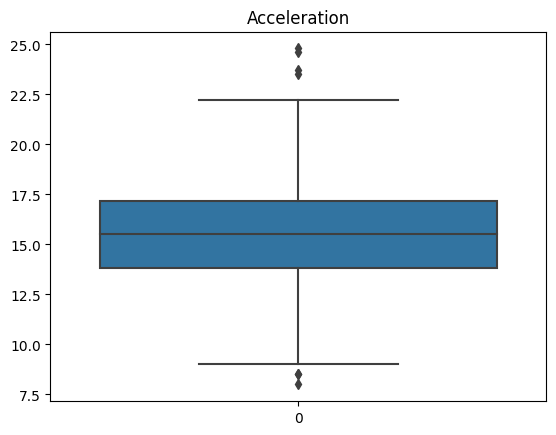

In [30]:
# Recognizing outliers using boxplot
# Before outlier treatment
sns.boxplot(df['acceleration'])
plt.title("Acceleration")
plt.show()
# After outlier treatment
q1 = df['acceleration'].quantile(0.25)
q3 = df['acceleration'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

<Axes: title={'center': 'Acceleration without outliers'}>

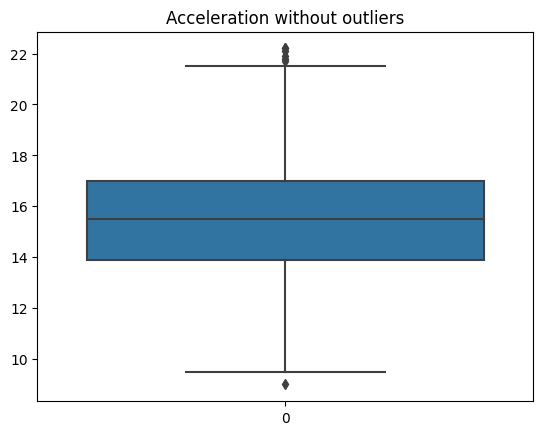

In [35]:
df_acceleration = df[(df['acceleration'] >= lower) & (df['acceleration'] <= upper)]
plt.title("Acceleration without outliers")
sns.boxplot(df_acceleration['acceleration'])

<Axes: >

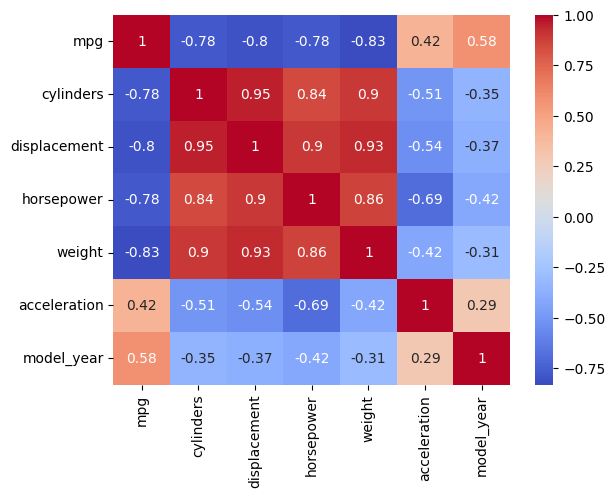

In [37]:
#hatmap correlation b/w attributes
X = df.drop(['name','origin'],axis=1)
corr=X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

/home/abhishekg/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abhishekg/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abhishekg/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abhishekg/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: ylabel='Count'>

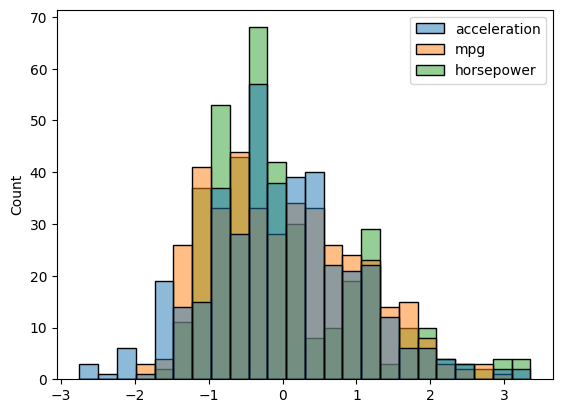

In [45]:
#Standardize the continuous variable
var = ['acceleration','mpg','horsepower']
scaler = StandardScaler()
df[var] = scaler.fit_transform(df[var])
sns.histplot(df[var])